## Data Visualization - CB4_64_1

This document presents examples of data visualization using CBERS4 identity BDC's cube (CB4_64_1 collection)

> This simple example aims to present how to use the data from the BDC data stored inside the ODC. To know all the possible products, use [BDC-STAC](http://brazildatacube.dpi.inpe.br/stac/).

In [1]:
import datacube

Creating connection to datacube 

In [2]:
dc = datacube.Datacube(app = 'dataviz')

viewing all registered products

In [3]:
dc.list_products()

,name,description,product_type,platform,time,format,instrument,lat,label,creation_time,lon,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
5,CB4_64_1,CBERS 4 version 1,identity,CBERS4,None,GeoTiff,AWFI,None,None,None,None,+proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat...,"(-64, 64)",None,"(y, x)"
1,CB4_64_16D_STK_1,CBERS 4 version 1,cyclic_16_day,CBERS4,None,GeoTiff,AWFI,None,None,None,None,+proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat...,"(-64, 64)",None,"(y, x)"
3,LC8_30_1,Landsat-8 16 days in year,identity,LANDSAT_8,None,GeoTiff,OLI,None,None,None,None,+proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat...,"(-30, 30)",None,"(y, x)"
2,LC8_30_16D_STK_1,Landsat-8 16 days in year,cyclic_16_day,LANDSAT_8,None,GeoTiff,OLI,None,None,None,None,+proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat...,"(-30, 30)",None,"(y, x)"


Let us work with CB4_64_1. To do this, let us visualize the measurements available in this product

In [4]:
selected_product = 'CB4_64_1'

dc.list_measurements().loc[selected_product]

,name,dtype,units,nodata,aliases
measurement,,,,,
BAND13,BAND13,int16,m,-9999.0,[blue]
BAND14,BAND14,int16,m,-9999.0,[green]
BAND15,BAND15,int16,m,-9999.0,[red]
BAND16,BAND16,int16,m,-9999.0,[nir]
EVI,EVI,int16,m,-9999.0,[evi]
NDVI,NDVI,int16,m,-9999.0,[ndvi]


For this example, let us start by visualizing the color composition of the images. Looking at the table, we will need the bands 13, 14, and 15 of CBERS4

In [5]:
measurements = {
    'red': 'BAND15',
    'green': 'BAND14',
    'blue': 'BAND13'
}

Before loading the data, let us select a region of interest. For this, we will use some of the utilities available in the ODC. First, let us see where you have data available for the selected cube

> `odc.ui` library belongs to odc-tools application suite. Check [odc-tools repo here](https://github.com/opendatacube/odc-tools)

In [6]:
from odc.ui import DcViewer

In [7]:
DcViewer(dc = dc, time = '2016', width='1200px', zoom = 6)

Ok! Let us choose to use the Ibitinga-SP region. Let us define the rectangle's minimum and maximum points covering the region and visualize on the map.

In [11]:
x = (-49.08210754394531, -48.67561340332031)
y = (-21.712938574040148, -22.16069877473883)

> utils is a set of code made available by ODC developers to facilitate operations commonly performed when working with data cubes in the xarray structure. Check [odc-notebooks here](https://github.com/opendatacube/datacube-notebooks)

In [9]:
from utils.data_cube_utilities.dc_display_map import display_map

In [12]:
display_map(y, x)

We will now import the available data into this region.

In [ ]:
# progress bar in load
from odc.ui import with_ui_cbk

In [16]:
cube_ibitinga = dc.load(
    product=selected_product,
    resolution=(-30, 30),
    x = x,
    y = y,
    progress_cbk=with_ui_cbk()
)

cube_ibitinga

With the products loaded, we will visualize some of them using the xarray plot features. 

In [33]:
# slice go from 5 to 55 using 10 as step
cube_ibitinga_subset = cube_ibitinga.isel(time = (slice(5, 55, 10)))

Now let's see the EVI value of each of the elements selected in the slice

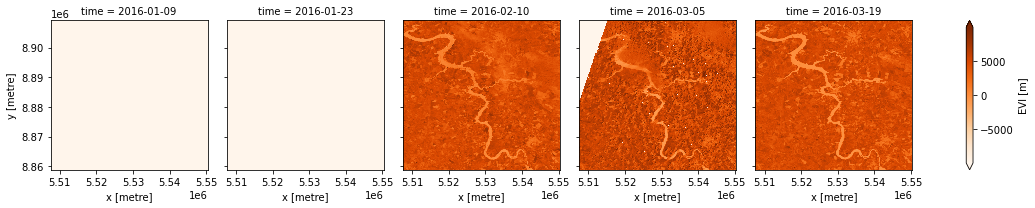

In [34]:
cube_ibitinga_subset.EVI.plot(robust = True, cmap = "Oranges", col = "time")

We can also make the image visualization in false colors (RGB). 

> The RGB function is also available in the package available with the ODC notebooks

In [48]:
import matplotlib.pyplot as plt
from utils.data_cube_utilities.dc_rgb import rgb

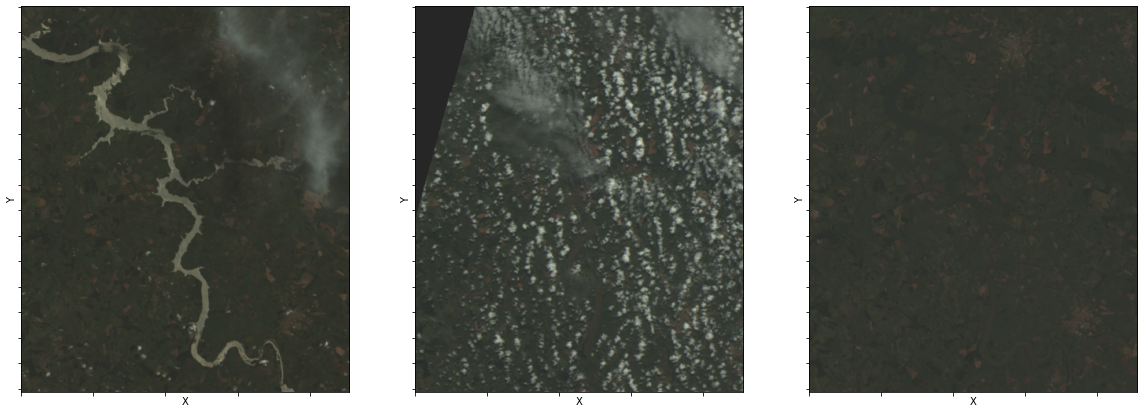

In [68]:
_, axs = plt.subplots(figsize = (20, 20), ncols=3)

# plot all elements from slice query
rgb(cube_ibitinga_subset, bands=list(measurements.values()), 
        x_coord = 'x', y_coord = 'y', at_index = 2, ax = axs[0])

rgb(cube_ibitinga_subset, bands=list(measurements.values()), 
        x_coord = 'x', y_coord = 'y', at_index = 3, ax = axs[1])

rgb(cube_ibitinga_subset, bands=list(measurements.values()), 
        x_coord = 'x', y_coord = 'y', at_index = 4, ax = axs[2])

# matplotlib settings
for ax in axs:
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

plt.show()

### Pixel drill

To finish, we will make the visualization of the temporal variation of a NDVI pixel. In this operation we will consider all the data we import with `dc.load`

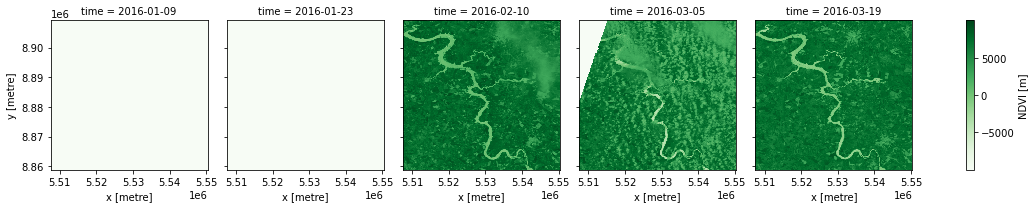

In [72]:
cube_ibitinga_subset.NDVI.plot(robust = True, cmap = "Greens", col = "time")

To start we will choose a pixel. Here the location pixel (5519917.444712814, 8900107.63208086) will be used. Now, with the sel method we will drill the data cube

In [88]:
pixel_drill_index = cube_ibitinga.sel(x=[5519917.444712814], y=[8900107.63208086], method = 'nearest')
pixel_drill_index

<xarray.Dataset>
Dimensions:      (time: 1096, x: 1, y: 1)
Coordinates:
  * time         (time) datetime64[ns] 2016-01-01 2016-01-03 ... 2020-07-25
  * y            (y) float64 8.9e+06
  * x            (x) float64 5.52e+06
    spatial_ref  int32 0
Data variables:
    BAND13       (time, y, x) int16 4393 -9999 1826 -9999 ... -9999 -9999 -9999
    BAND14       (time, y, x) int16 4720 -9999 2139 -9999 ... -9999 -9999 -9999
    BAND15       (time, y, x) int16 4217 -9999 1925 -9999 ... -9999 -9999 -9999
    BAND16       (time, y, x) int16 5909 -9999 4571 -9999 ... -9999 -9999 -9999
    EVI          (time, y, x) int16 5118 -9999 5323 -9999 ... -9999 -9999 -9999
    NDVI         (time, y, x) int16 1670 -9999 4073 -9999 ... -9999 -9999 -9999
Attributes:
    crs:              +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x...
    grid_mapping:     spatial_ref
    dc_partial_load:  True

There are NA values in the way, let's remove them and make the view

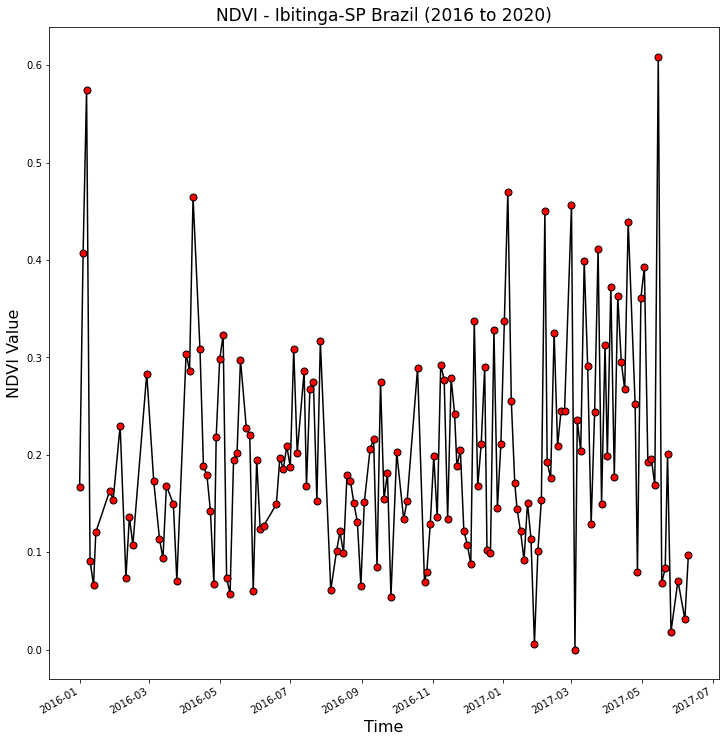

In [124]:
(pixel_drill_index.where(pixel_drill_index.NDVI >= 0, drop = True).NDVI / 10000).plot(
    figsize = (12, 12), linestyle = '-', marker = 'o', color = 'k', markerfacecolor='red', markersize = 7
)

plt.title('NDVI - Ibitinga-SP Brazil (2016 to 2020)', fontsize = 17)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('NDVI Value', fontsize = 16)
plt.show()